In [1]:
import sys
sys.path.append('..')


In [ ]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

from optimization_algorithms import (
    SGD,
    WASGD,
    SNARiccati,
    WASNARiccati,
    USNA,
    UWASNA,
    SNA,  # without Riccati
    WASNA,  # without Riccati
)

N = 20
n = 10_000

optimizer_list = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNARiccati(nu=1.0),
    WASNARiccati(nu=1.0),
    USNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.75, generate_Z="canonic"),
]

optimizer_list_without_riccati = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    WASGD(nu=0.5),
    SNA(nu=1.0),
    WASNA(),
    USNA(nu=1.0, gamma=0.75, c_nu=5.0, generate_Z="canonic"),
    UWASNA(gamma=0.75, c_nu=5.0, generate_Z="canonic"),
]

batch_size = 1

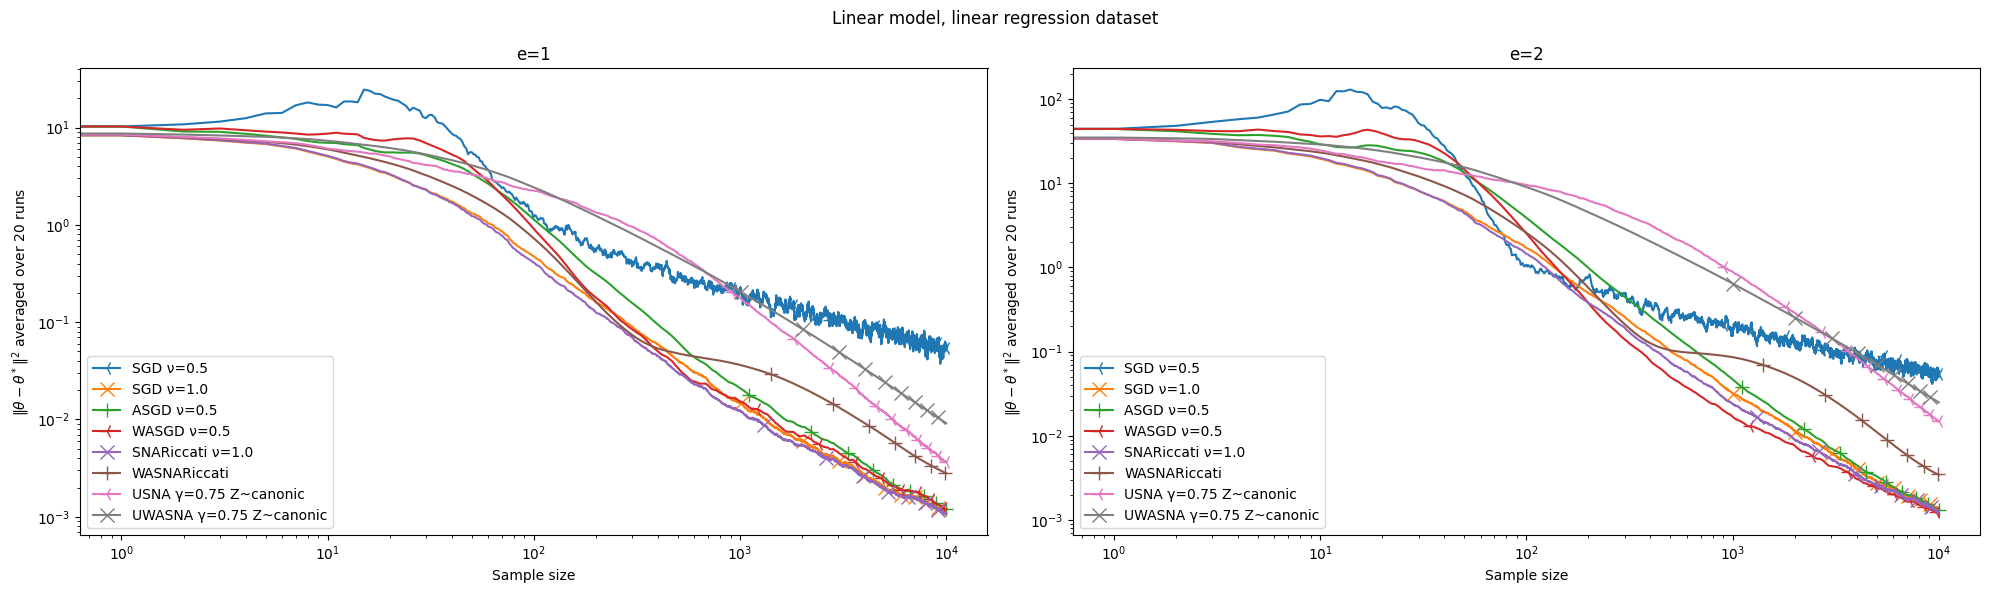

In [3]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

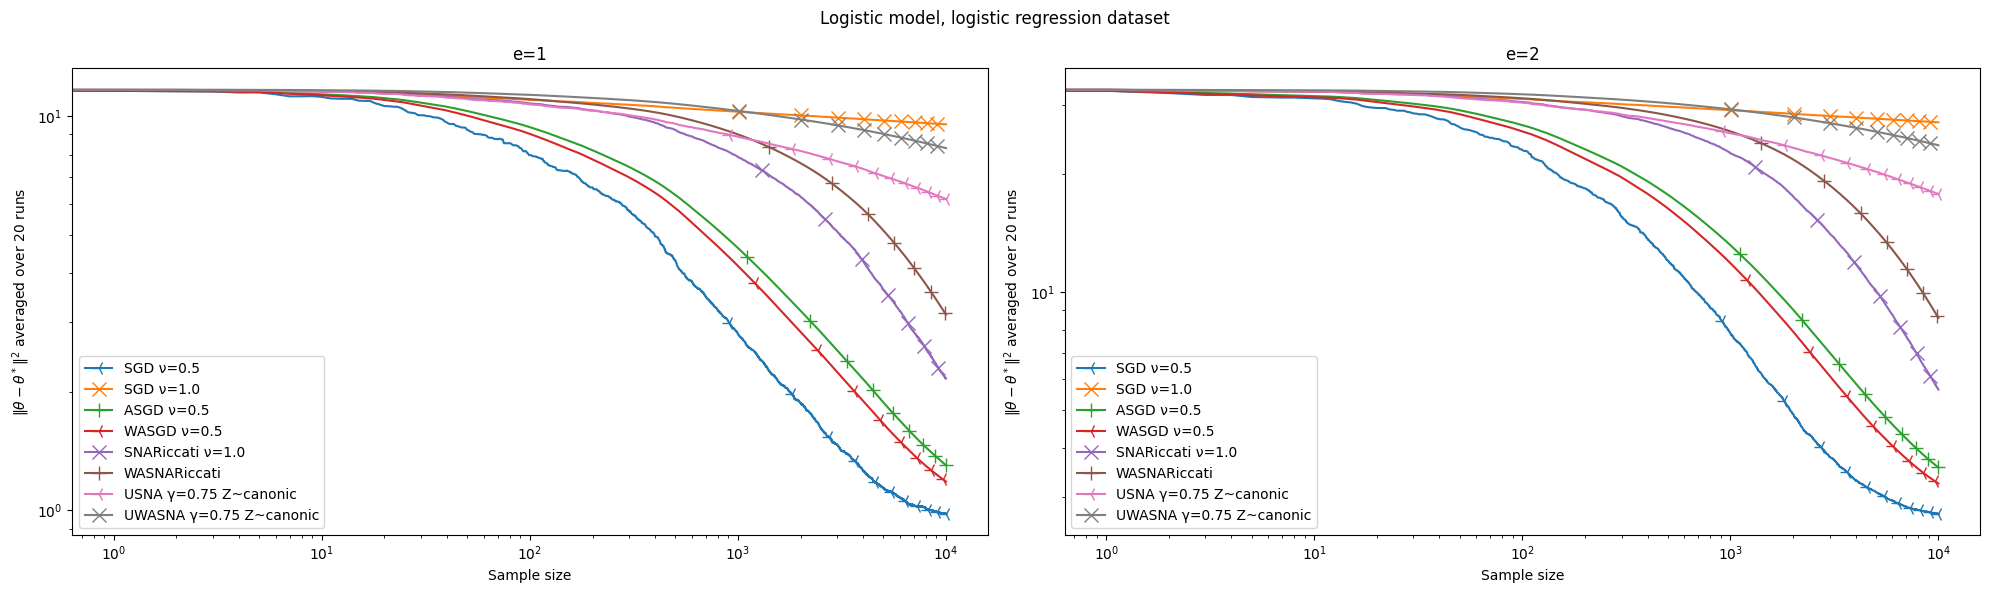

In [4]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

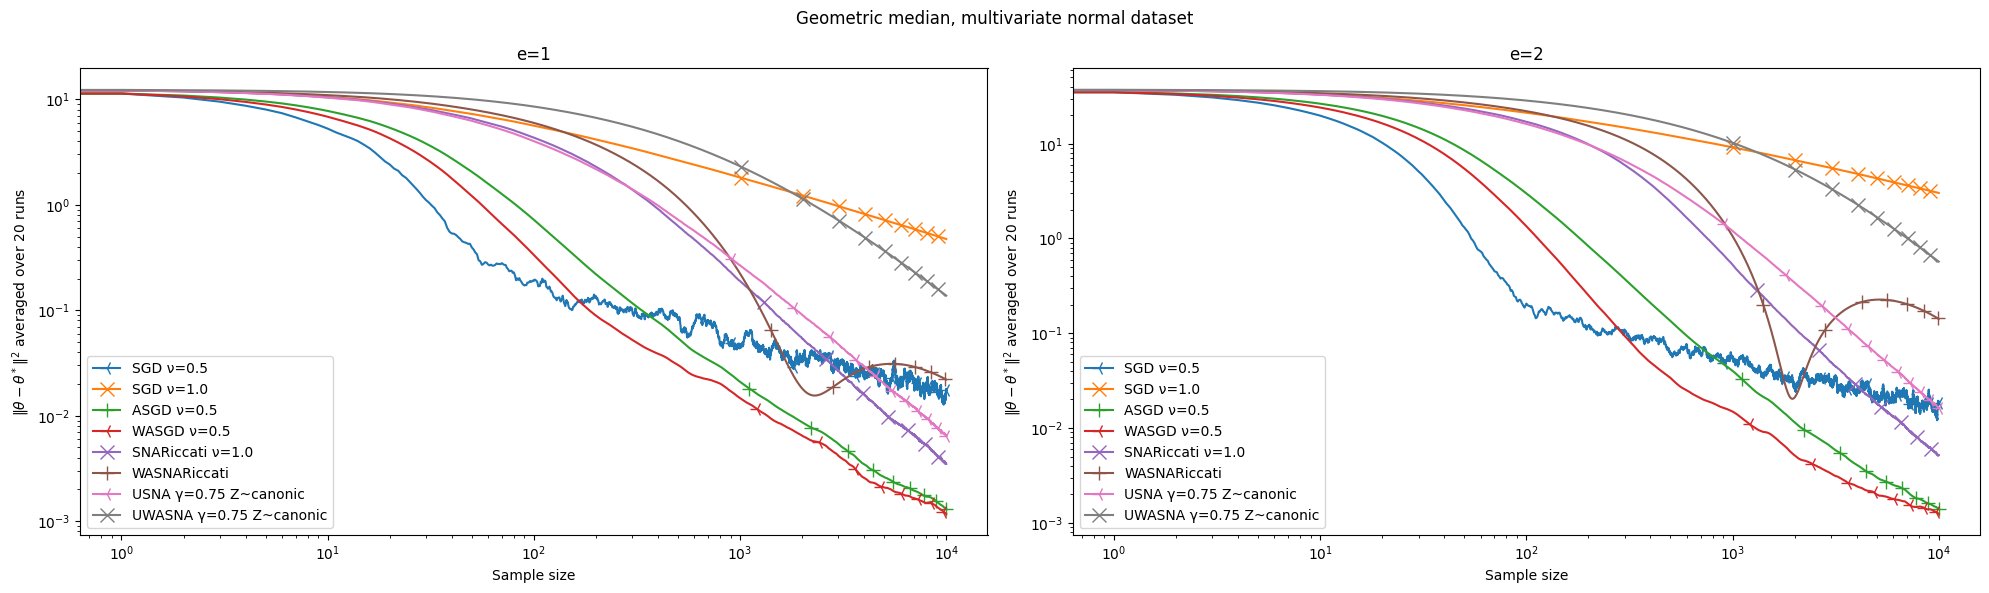

In [5]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

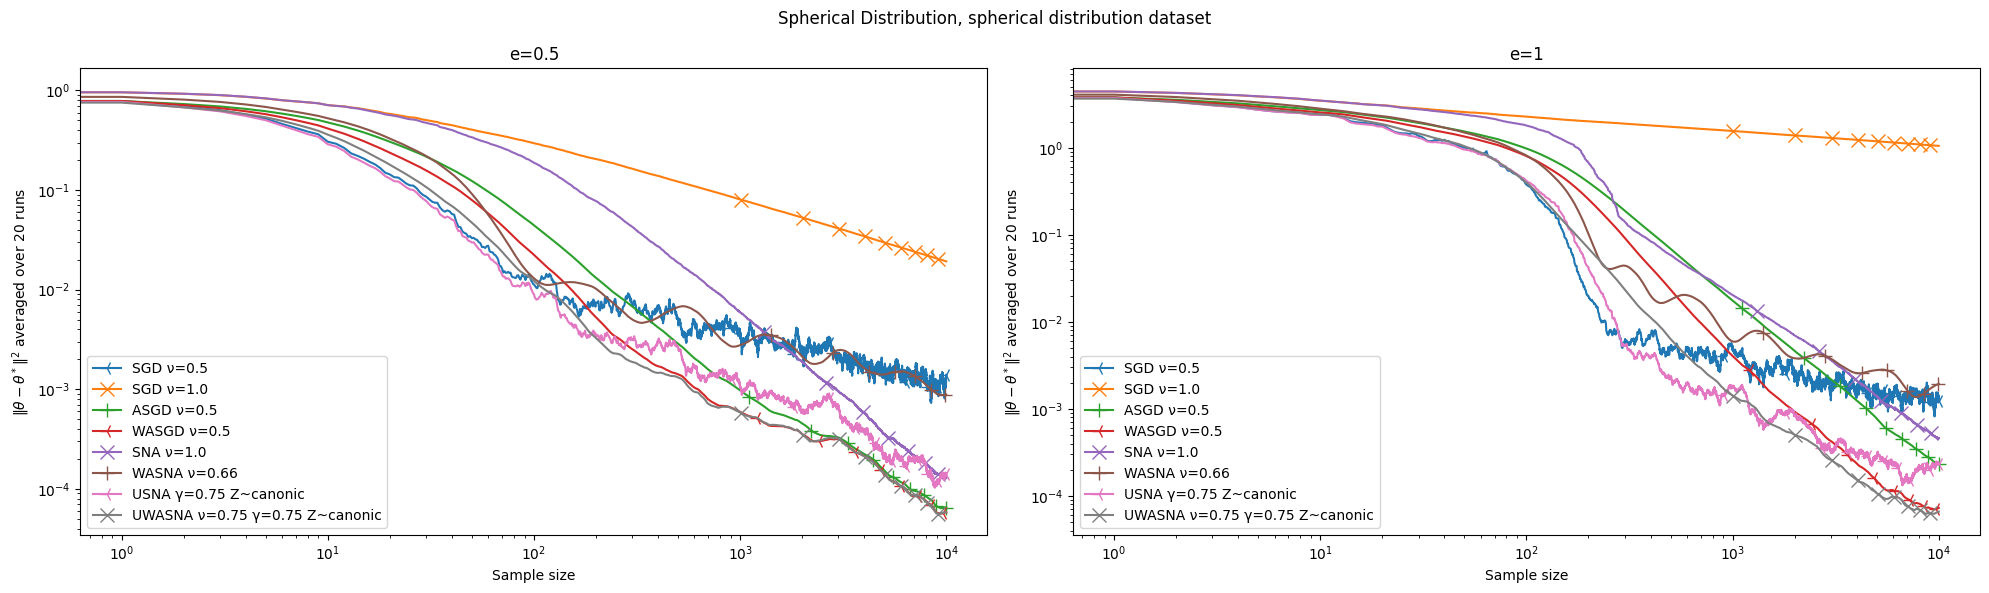

In [6]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

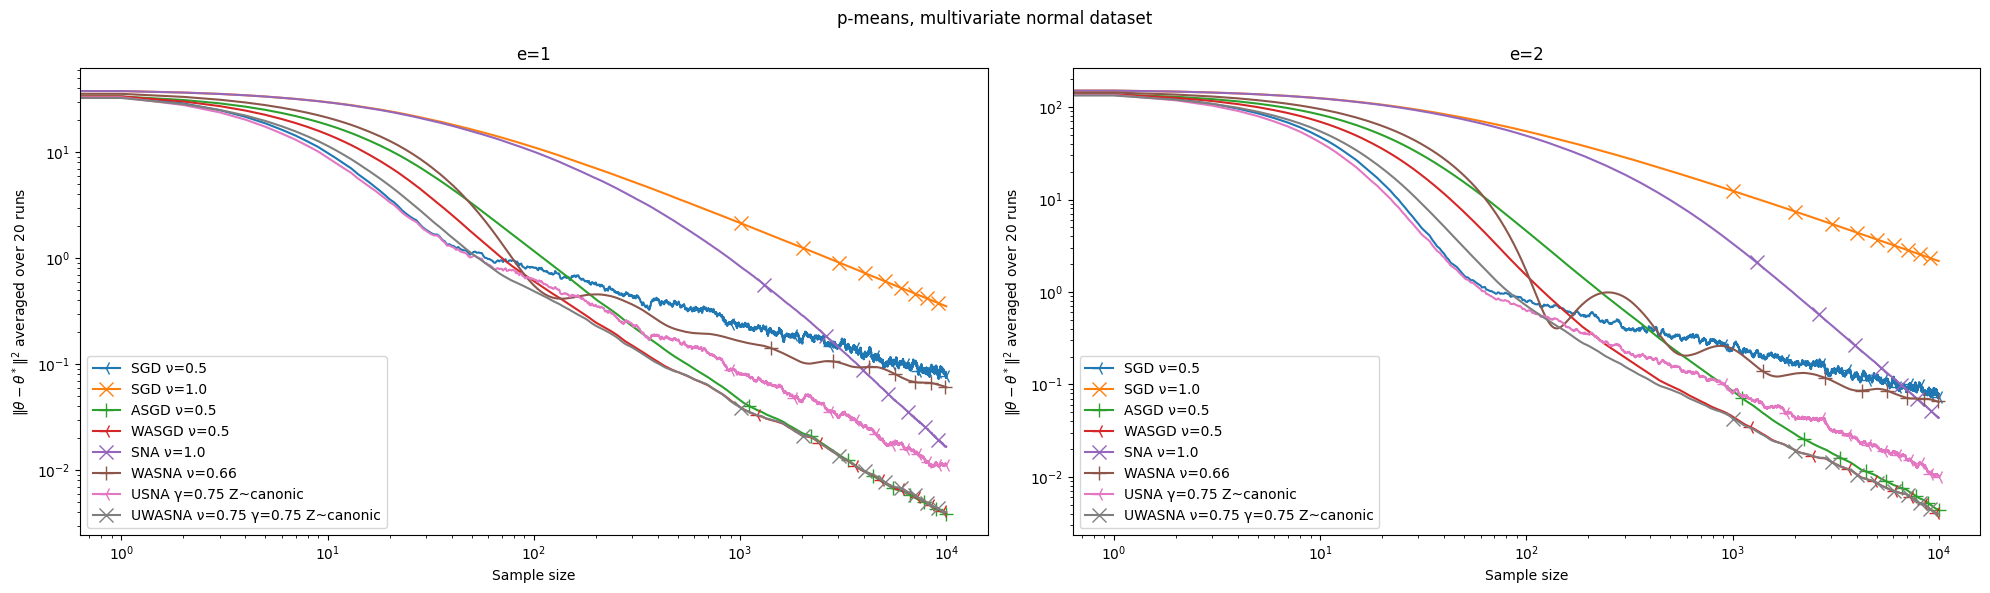

In [7]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n, batch_size=batch_size)

In [2]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run(batch_size=batch_size)

Optimizers:   0%|          | 0/8 [00:00<?, ?it/s]

Data:   0%|          | 0/464810 [00:00<?, ?it/s]

,SGD ν=0.5,SGD ν=1.0,ASGD ν=0.5,WASGD ν=0.5,SNARiccati ν=1.0,WASNARiccati,USNA γ=0.75 Z~canonic,UWASNA γ=0.75 Z~canonic
Training Accuracy,63.650000,72.330000,72.500000,72.750000,76.590000,58.420000,36.480000,63.520000
Test Accuracy,63.720000,72.400000,72.490000,72.800000,76.480000,58.340000,36.400000,63.600000
